# Chapter 2: Classifying with Real-world Examples

### Classification (type of supervised learning)
- given labeled examples, can we design a rule to be later applied to other examples?

### Classification example 
- Spam email detector trained using spam and ham (non-spam) messages.

### Dataset
- Collection of morpholigical measurments of several Iris flowers.
- 150 instances, 4 features

### Features
- Sepal length
- Sepal width
- Petal length
- Petal width

### Question
- Given these examples, if we see a new flower out in the field, could we make a good prediction about its species from its measurements?

### Visualization as initial exploratory analysis allow:
- learning the general features of the data set.
- catching of problems that occured with data collection early.


data type:  <class 'sklearn.datasets.base.Bunch'>
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


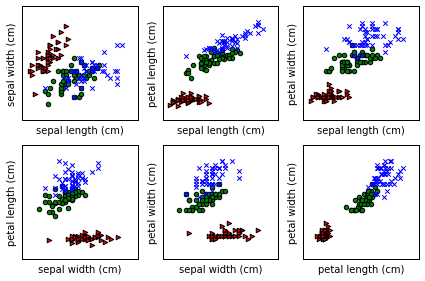

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

## iris dataset load

data=load_iris()
print("data type: ",type(data))

features=data.data
feature_names=data.feature_names
print("feature names:",feature_names)

target=data.target
target_names=data.target_names
print("target names:",target_names)

## plotting iris data set

fig,axes=plt.subplots(2,3)
pairs=[(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
color_markers=[('r','>'),('g','o'),('b','x')]

for i,(p0,p1) in enumerate(pairs):
    ax=axes.flat[i] # creates 1d image
    for t in range(3):
        c,marker=color_markers[t]
        ax.scatter(features[target==t,p0],features[target==t,p1],marker=marker,c=c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.show() # fig.savefig('filename')

We can see that there are two large groups: 
+ Iris Setosa (triangles)
+ Mixture of Iris Versicolor (circles) and Iris Virginica (x marks).

### Classification Model - Simple Threshold Model
Looking at data, petal length seems to be able to separate Iris Setosa from the other two flower species. We can discover the cut-off as:

In [2]:
labels_all=target_names[target]
print("labels_all:",labels_all)

labels_all: ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 've

In [3]:
petal_length=features[:,2] # petal length is feature at position 2
print("petal_length:",petal_length)

petal_length: [ 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  1.5  1.6  1.4  1.1  1.2
  1.5  1.3  1.4  1.7  1.5  1.7  1.5  1.   1.7  1.9  1.6  1.6  1.5  1.4  1.6
  1.6  1.5  1.5  1.4  1.5  1.2  1.3  1.5  1.3  1.5  1.3  1.3  1.3  1.6  1.9
  1.4  1.6  1.4  1.5  1.4  4.7  4.5  4.9  4.   4.6  4.5  4.7  3.3  4.6  3.9
  3.5  4.2  4.   4.7  3.6  4.4  4.5  4.1  4.5  3.9  4.8  4.   4.9  4.7  4.3
  4.4  4.8  5.   4.5  3.5  3.8  3.7  3.9  5.1  4.5  4.5  4.7  4.4  4.1  4.
  4.4  4.6  4.   3.3  4.2  4.2  4.2  4.3  3.   4.1  6.   5.1  5.9  5.6  5.8
  6.6  4.5  6.3  5.8  6.1  5.1  5.3  5.5  5.   5.1  5.3  5.5  6.7  6.9  5.
  5.7  4.9  6.7  4.9  5.7  6.   4.8  4.9  5.6  5.8  6.1  6.4  5.6  5.1  5.6
  6.1  5.6  5.5  4.8  5.4  5.6  5.1  5.1  5.9  5.7  5.2  5.   5.2  5.4  5.1]


In [4]:
is_setosa=(labels_all=="setosa")
print("is_setosa:",is_setosa)

is_setosa: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [5]:
max_setosa=petal_length[is_setosa].max()
print("Maximum of setosa: {0}".format(max_setosa))
min_non_setosa=petal_length[~is_setosa].min()
print("Minimum of non-setosa: {0}".format(min_non_setosa))

Maximum of setosa: 1.9
Minimum of non-setosa: 3.0


So, this can be our **simple threshold model**: *if the petal length is smaller than 2, then this is an Iris Setosa flower; otherwise it is either Iris Virginica or Iris Versicolor.*

In this case, we did not actually do any machine learning. Instead, we looked at the data ourselves, looking for a separation between the classes. Machine learning happens when we write code to look for this separation automatically.

we cannot immediately see what the best threshold is for distinguishing Iris Virginica from Iris Versicolor. We can even see that we will never achieve perfect separation with these features. We could, however, look for the best possible separation, the separation that makes the fewest mistakes.



In [6]:
features_non_setosa=features[~is_setosa]
print("features_non_setosa:",features_non_setosa)

features_non_setosa: [[ 7.   3.2  4.7  1.4]
 [ 6.4  3.2  4.5  1.5]
 [ 6.9  3.1  4.9  1.5]
 [ 5.5  2.3  4.   1.3]
 [ 6.5  2.8  4.6  1.5]
 [ 5.7  2.8  4.5  1.3]
 [ 6.3  3.3  4.7  1.6]
 [ 4.9  2.4  3.3  1. ]
 [ 6.6  2.9  4.6  1.3]
 [ 5.2  2.7  3.9  1.4]
 [ 5.   2.   3.5  1. ]
 [ 5.9  3.   4.2  1.5]
 [ 6.   2.2  4.   1. ]
 [ 6.1  2.9  4.7  1.4]
 [ 5.6  2.9  3.6  1.3]
 [ 6.7  3.1  4.4  1.4]
 [ 5.6  3.   4.5  1.5]
 [ 5.8  2.7  4.1  1. ]
 [ 6.2  2.2  4.5  1.5]
 [ 5.6  2.5  3.9  1.1]
 [ 5.9  3.2  4.8  1.8]
 [ 6.1  2.8  4.   1.3]
 [ 6.3  2.5  4.9  1.5]
 [ 6.1  2.8  4.7  1.2]
 [ 6.4  2.9  4.3  1.3]
 [ 6.6  3.   4.4  1.4]
 [ 6.8  2.8  4.8  1.4]
 [ 6.7  3.   5.   1.7]
 [ 6.   2.9  4.5  1.5]
 [ 5.7  2.6  3.5  1. ]
 [ 5.5  2.4  3.8  1.1]
 [ 5.5  2.4  3.7  1. ]
 [ 5.8  2.7  3.9  1.2]
 [ 6.   2.7  5.1  1.6]
 [ 5.4  3.   4.5  1.5]
 [ 6.   3.4  4.5  1.6]
 [ 6.7  3.1  4.7  1.5]
 [ 6.3  2.3  4.4  1.3]
 [ 5.6  3.   4.1  1.3]
 [ 5.5  2.5  4.   1.3]
 [ 5.5  2.6  4.4  1.2]
 [ 6.1  3.   4.6  1.4]
 [ 5.8  2.6  

In [7]:
labels_non_setosa=labels_all[~is_setosa]
print("labels_non_setosa:",labels_non_setosa)

labels_non_setosa: ['versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'vir

In [8]:
is_virginica=(labels_non_setosa=='virginica')
print("is_virginica:",is_virginica)
is_versicolor=(labels_non_setosa=='versicolor')
print("is_versicolor:",is_versicolor)

is_virginica: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
is_versicolor: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False Fa

We run a loop over all possible features and thresholds to see which one results in better accuracy. Accuracy is simply the fraction of examples that the model classifies correctly.

We need to test two types of thresholds for each feature and value: we test a greater than threshold and the reverse comparison.

The little trick of computing the mean of the comparisons gives us the fraction of correct results, the accuracy.

At the end of the for loop, all the possible thresholds for all the possible features have been tested, and the variables best_fi, best_t, and best_reverse hold our model.

In [9]:
import numpy as np

def fit_model(features, labels):
    '''Learn a simple threshold model'''
    best_acc = -1.0
    # Loop over all the features:
    for fi in range(features.shape[1]):
        thresh = features[:, fi].copy()
        # test all feature values in order:
        thresh.sort()
        for t in thresh:
            pred = (features[:, fi] > t)

            # Measure the accuracy of this 
            acc = (pred == labels).mean()

            rev_acc = (pred == ~labels).mean()
            if rev_acc > acc:
                acc = rev_acc
                reverse = True
            else:
                reverse = False
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse

    print('Best threshold is {0} on feature {1} (index {2}),which achieves accuracy of {3:.2%}.'\
          .format(best_t, data.feature_names[best_fi], best_fi, best_acc))
    
    # A model is a threshold and an index
    return best_t, best_fi, best_reverse

def predict(model, features):
    '''Apply a learned model'''
    # A model is a pair as returned by fit_model
    t, fi, reverse = model
    if reverse:
        return features[:, fi] <= t
    else:
        return features[:, fi] > t

def accuracy(features, labels, model):
    '''Compute the accuracy of the model'''
    preds = predict(model, features)
    acc = np.mean(preds == labels)
    print("Accuracy is {:.2%}".format(acc))
    return acc

In [10]:
model=fit_model(features_non_setosa,is_virginica)
acc=accuracy(features_non_setosa,is_virginica,model)

Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 94.00%.
Accuracy is 94.00%


In [11]:
model=fit_model(features_non_setosa,is_versicolor)
acc=accuracy(features_non_setosa,is_versicolor,model)

Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 94.00%.
Accuracy is 94.00%


### Best Model ###
Running the code on the whole data, the model identified as the best makes decisions by splitting on the petal width.

### Decision Boundary Visualization ###
To see which feature values will result in one decision versus the other and exactly where the boundary is.



C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


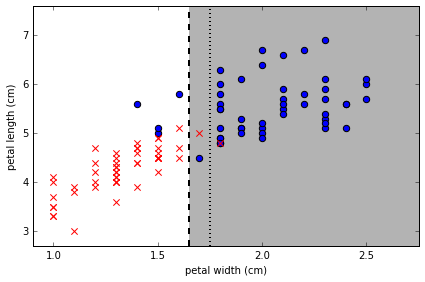

In [12]:
COLOR_FIGURE=False

## hand fixed threshold
t=1.65
t2=1.75

## features: sepal length, sepal width
## , petal length, petal width
## features to use: 3, 2
## (x=petal_width, y=petal_length)
f0,f1=3,2

if COLOR_FIGURE:
    area1c=(1.,.8,.8)
    area2c=(.8,.8,1.)
else:
    area1c=(1.,1,1)
    area2c=(.7,.7,.7)

## plot from 90% of smallest value to 110% of largest 
## value. (all feature values are positive, otherwise 
## this would not work very well)

## petal_width
x0=features_non_setosa[:,f0].min()*.9
x1=features_non_setosa[:,f0].max()*1.1

## petal_length
y0=features_non_setosa[:,f1].min()*.9
y1=features_non_setosa[:,f1].max()*1.1

fig2,ax2=plt.subplots() # one figure

## white from x0>>t, grey from t>>x1 for all y values
ax2.fill_between([x0,t],[y0,y0],[y1,y1],color=area1c)
ax2.fill_between([t,x1],[y0,y0],[y1,y1],color=area2c)

## vertical lines: --, ::
ax2.plot([t,t],[y0,y1],"k--",lw=2)
ax2.plot([t2,t2],[y0,y1],"k:",lw=2)

ax2.scatter(features_non_setosa[is_virginica,f0],
            features_non_setosa[is_virginica,f1],
            c="b",marker="o",s=40)
ax2.scatter(features_non_setosa[~is_virginica,f0],
            features_non_setosa[~is_virginica,f1],
            c="r",marker="x",s=40)

ax2.set_ylim(y0,y1)
ax2.set_xlim(x0,x1)
ax2.set_xlabel(feature_names[f0])
ax2.set_ylabel(feature_names[f1])
fig2.tight_layout()
fig2.show()

Above we see two regions: one is white and the other is shaded in grey. Any datapoint that falls on the white region will be classified as Iris Virginica, while any point that falls on the shaded side will be classified as Iris Versicolor.
It also shows (as a dashed line) an alternative threshold, which will achieve exactly the same accuracy. Our method chose the first threshold it saw, but that was an arbitrary choice.

In a threshold model, the decision boundary will always be a line that is parallel to one of the axes.

### Evaluation - Holding out data and cross-validation ###

In the above example, we used the data to define what the threshold will be, and then we used the same data to evaluate the model. What we really want to do is estimate the ability of the model to generalize to new instances. We should measure its performance in instances that the algorithm has not seen at training.

In [13]:
## As setosa examples are too easy,
## we will classify virginica vs non-virginica

## split the data in two: testing and training
testing=np.tile([True,False],50) # testing=[True,False,True,False,...]
training=~testing
model=fit_model(features_non_setosa[training],is_virginica[training])


Best threshold is 4.7 on feature petal length (cm) (index 2),which achieves accuracy of 96.00%.


In [14]:
train_accuracy=accuracy(features_non_setosa[training],is_virginica[training],model)
test_accuracy=accuracy(features_non_setosa[testing],is_virginica[testing],model)
print('''\
Training accuracy was {0:.1%}.
Testing accuracy was {1:.1%} (N = {2}).
'''.format(train_accuracy, test_accuracy, testing.sum()))

Accuracy is 96.00%
Accuracy is 90.00%
Training accuracy was 96.0%.
Testing accuracy was 90.0% (N = 50).



The result on the training data (which is a subset of the whole data) is apparently even better than before. The result in the testing data is lower than that of the training error, which is expected that testing accuracy will be lower than the training accuracy. To see why, look back at the plot that showed the decision boundary. Consider what would have happened if some of the examples close to the boundary were not there or that one of them between the two lines was missing. It is easy to imagine that the boundary will then move a little bit to the right or to the left so as to put them on the wrong side of the border.

In this example, the difference between the accuracy measured on training data and on testing data is not very large. When using a complex model, it is possible to get 100 percent accuracy in training and do no better than random guessing on testing!

** In the above example, we only used half the data for training. Ideally, we would like to use all of the data for training and all of the data for testing as well, which is impossible.
We can achieve a good approximation of this impossible ideal by a method called cross-validation. One simple form of cross-validation is leave-one-out cross-validation. We will take an example out of the training data, learn a model without this example, and then test whether the model classifies this example correctly. This process is then repeated for all the elements in the dataset.** 

In [15]:
correct=0.0
for ei in range(len(features_non_setosa)):
    # select all but the one at position 'ei':
    training=np.ones(len(features_non_setosa),bool)
    training[ei]=False
    testing=~training
    model=fit_model(features_non_setosa[training],is_virginica[training])
    predictions=predict(model,features_non_setosa[testing])
    correct+=np.sum(predictions==is_virginica[testing])
acc=correct/float(len(features_non_setosa))
print("Accuracy: {0:.1%}".format(acc))

Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 4.7 on feature petal length (cm) (index 2),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 93.94%.
Best threshold is 1.6 on feature petal width (cm)

Leave-one-out cross validation gives us a reliable estimate of how well the models would generalize without any circulatory problems. However, as must learn a whole new model for each and every example, this becomes unweildy very quickly as our dataset grows.

Better approach would be to use x-fold cross validation, where x stands for a small number. For example, five-fold cross validation breaks up the data into 5 groups/folds. Hence, we only learn five models in this case. The code will be the same as above, but we leave 20% of the data out (20/80 testing/training), then test each of the 5 models on the left-out fold and average the results.

![alt text](images/2772OS_02_03.jpg "x-fold cross validation")

There is a trade-off between computational efficiency (the more folds, the more computation is necessary) and accurate results (the more folds, the closer you are to using the whole of the data for training). Five folds is often a good compromise.

When generating the folds, you need to be careful to keep them balanced. For example, if all of the examples in one fold come from the same class, then the results will not be representative. We will not go into the details of how to do this, because the machine learning package scikit-learn will handle them for you.

A cross-validation schedule allows you to use all your data to estimate whether your methods are doing well. At the end of the cross-validation loop, you can then use all your data to train a final model.

It is seen as a very bad sign to even discuss the training accuracy of a classification system. We always want to measure and compare either the error on a held-out dataset or the error estimated using a cross-validation scheme.

### Building more complex classifiers ###

** Aspect of classification model **
+ **The structure of the model**
    - Logic used in the model. Simple threshold check etc.
+ **The search for the model**
    - How do we find the model we need to use. scikit-learn library implements advanced optimization methods to find a good solution.
+ **The gain or loss function**
    - What the gain/cost function should be is always dependent on the exact problem you are working on. When we present a general-purpose algorithm, we often focus on minimizing the number of mistakes, achieving the highest accuracy. However, if some mistakes are costlier than others, it might be better to accept a lower overall accuracy to minimize the overall costs. 
    - In spam filtering, it may be worse to delete a good e-mail than to erroneously let a bad e-mail through. In that case, we may want to choose a model that is conservative in throwing out e-mails rather than the one that just makes the fewest mistakes overall.
    - In a medical setting, false negatives and false positives are not equivalent. A false negative (when the result of a test comes back negative, but that is false) might lead to the patient not receiving treatment for a serious disease. A false positive (when the test comes back positive even though the patient does not actually have that disease) might lead to additional tests to confirm or unnecessary treatment (which can still have costs, including side effects from the treatment, but are often less serious than missing a diagnostic). Therefore, depending on the exact setting, different trade-offs can make sense. At one extreme, if the disease is fatal and the treatment is cheap with very few negative side-effects, then you want to minimize false negatives as much as you can.
    
### A more complex dataset and a more complex classifier ###

### Learning about the Seeds dataset ###
An agricultural dataset consisting of wheat seeds measurments, available at [UCI Machine Learning Dataset Repository](http://archive.ics.uci.edu/ml/).

+ **Features**
    - area A
    - perimeter P
    - compactness C = 4πA/P²
    - length of kernel
    - width of kernel
    - asymmetry coefficient
    - length of kernel groove
+ **Classes**
    - Canadian
    - Koma
    - Rosa
    
### Features and feature engineering ###

+ **Feature Engineering**
    - The compactness feature is not actually a new measurement, but a function of the previous two features, area and perimeter. Trying to create new features is generally called **feature engineering**. Domain knowledge is required to design good features. A simple algorithm on well-chosen features will perform better than a fancy algorithm on not-so-good features.
    - Compactness is also sometimes called roundness. This feature will have the same value for two kernels, one of which is twice as big as the other one, but with the same shape. However, it will have different values for kernels that are very round (when the feature is close to one) when compared to kernels that are elongated (when the feature is closer to zero).
    - The goals of a good feature are to simultaneously vary with what matters (the desired output) and be invariant with what does not. For example, compactness does not vary with size, but varies with the shape.
+ **Feature Selection**
    - If we have thousands of features, selecting a few that are relevant to the problem at hand might make rest of the process easier and faster.

### Nearest neighbor classification ###
The nearest neighbor method can be generalized to look not at a single neighbor, but to multiple ones and take a vote amongst the neighbors. This makes the method more robust to outliers or mislabeled data.

### Classifying with scikit-learn ###
The scikit-learn classification API is organized around classifier objects. 
These objects have the following two essential methods:
+ fit(features, labels): This is the learning step and fits the parameters of the model
+ predict(features): This method can only be called after fit and returns a prediction for one or more inputs

### Load Seeds Dataset ###

In [27]:
import numpy as np

def load_dataset(dataset_name):
    '''
    data, labels = load_dataset(dataset_name)
    Load a give dataset
    
    Returns
    -------
    data: numpy ndarray
    labels: list of str
    '''
    data=[]
    labels=[]
    filename=".\\ch02\\data\\{0}.tsv".format(dataset_name)
    with open(filename) as ifile:
        for line in ifile:
            tokens=line.strip().split('\t')
            data.append([float(tk) for tk in tokens[:-1]])
            labels.append(tokens[-1])
        data=np.array(data)
        labels=np.array(labels)
        return data,labels

### Nearest neighbor classification on Seeds dataset using Leave-one-out cross-validation ###

In [40]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

seeds_features, seeds_labels=load_dataset("seeds")
classifier=KNeighborsClassifier(n_neighbors=5) ## default is 5 n_neighbors

n=len(features)
correct=0.0
for ei in range(n):
    training=np.ones(n,bool)
    training[ei]=0
    testing=~training
    classifier.fit(seeds_features[training],seeds_labels[training])
    pred=classifier.predict(seeds_features[ei])
    correct+=(pred==seeds_labels[ei])
print("Result of leave-one-out:{0}".format(correct/n))


Result of leave-one-out:[ 0.9]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 210 but corresponding boolean dimension is 150
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d 

### Nearest neighbor classification on Seeds dataset using KFold cross-validation ###

In [43]:
from sklearn.cross_validation import KFold

## means will hold the mean for each fold
means=[]

# kf is a generator of pairs (training,testing) so that each iteration implements a separate fold.
kf = KFold(len(features), n_folds=3, shuffle=True)
for training,testing in kf:
    # We learn a model for this fold with `fit` and then apply it to the testing data with `predict`:
    classifier.fit(seeds_features[training], seeds_labels[training])
    prediction = classifier.predict(seeds_features[testing])

    # np.mean on an array of booleans returns the fraction of correct decisions for this fold:
    curmean = np.mean(prediction == seeds_labels[testing])
    means.append(curmean)
print('Result of cross-validation using KFold: {}'.format(means))

# The function cross_val_score does the same thing as the loop above with a single function call
from sklearn.cross_validation import cross_val_score
crossed = cross_val_score(classifier, seeds_features, seeds_labels)
print('Result of cross-validation using cross_val_score: {}'.format(crossed))

print("Mean accuracy: {:.1%}".format(np.mean(means)))
print("Mean cross_val_score accuracy: {:.1%}".format(np.mean(crossed)))


Result of cross-validation using KFold: [0.80000000000000004, 0.97999999999999998, 0.92000000000000004]
Result of cross-validation using cross_val_score: [ 0.91666667  0.88405797  0.8115942 ]
Mean accuracy: 90.0%
Mean cross_val_score accuracy: 87.1%
